# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-package

In [2]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
flatbuffers               24.3.25
fonttools                 4.53.0
fqdn                      1.5.1
gast                      0.6.0
google-pasta   

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2


In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\bikes\1446829798-4699.jpg
Issue with image data\bikes\2024-390-duke-right-side-view_270x180.jpg
Issue with image data\bikes\383685_21601_XL.jpg
Issue with image data\bikes\649bc0cf4b3f0.jpg
Issue with image data\bikes\6574395473486630f70aab92-hyper-bicycles-men-s-29-explorer-dual.jpg
Issue with image data\bikes\718bP3tu0L._AC_UF8941000_QL80_.jpg
Issue with image data\bikes\98767424.jpg
Issue with image data\bikes\banner_road_1269.jpg
Issue with image data\bikes\battery-opersted-car-for-kids-S191_green-main.jpg
Issue with image data\bikes\best-bikes-in-india.jpg
Issue with image data\bikes\Best-Vintage-Bikes-Of-India-e1694088002531.jpg
Issue with image data\bikes\Best_selling_Bikes_In_India_8f877a56c0.png
Issue with image data\bikes\bmw-g-310-r.jpg
Issue with image data\bikes\bmw-motorrad-bike-500x500.png
Issue with image data\bikes\BMW_BIKE_1660755976069_1660755985059_1660755985059.jpg
Issue with image data\bikes\city-bikes-sathuvacheri-vellore-motorcycle-dealers-

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 157 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

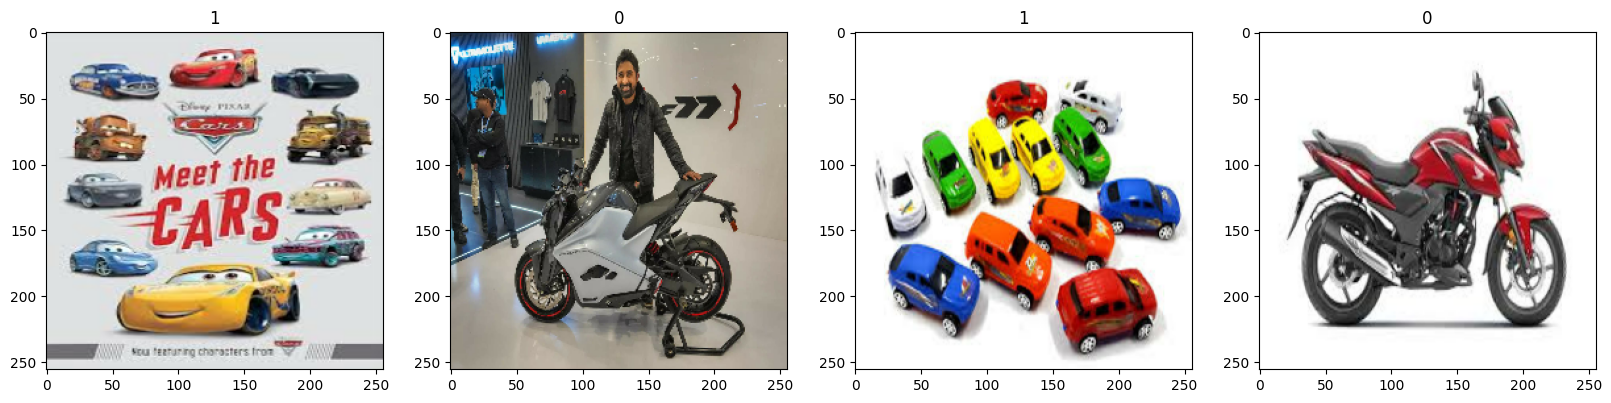

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.8039216 , 0.72156864, 0.23137255],
          [0.8039216 , 0.72156864, 0.23137255],
          [0.8039216 , 0.72156864, 0.23137255],
          ...,
          [0.79607844, 0.70980394, 0.23921569],
          [0.79607844, 0.70980394, 0.23921569],
          [0.79607844, 0.70980394, 0.23921569]],
 
         [[0.8039216 , 0.72156864, 0.23137255],
          [0.8039216 , 0.72156864, 0.23137255],
          [0.8039216 , 0.72156864, 0.23137255],
          ...,
          [0.79607844, 0.70980394, 0.23921569],
          [0.79607844, 0.70980394, 0.23921569],
          [0.79607844, 0.70980394, 0.23921569]],
 
         [[0.8039216 , 0.72156864, 0.23137255],
          [0.8039216 , 0.72156864, 0.23137255],
          [0.8039216 , 0.72156864, 0.23137255],
          ...,
          [0.79607844, 0.70980394, 0.23921569],
          [0.79607844, 0.70980394, 0.23921569],
          [0.79607844, 0.70980394, 0.23921569]],
 
         ...,
 
         [[0.60784316, 0.5019608 , 0.23137255],
          [0.60784

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

3

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=19, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.5651 - loss: 0.8043 - val_accuracy: 0.4062 - val_loss: 0.7994
Epoch 2/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.4961 - loss: 0.7436 - val_accuracy: 0.7188 - val_loss: 0.5481
Epoch 3/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.6016 - loss: 0.5992 - val_accuracy: 0.6875 - val_loss: 0.5577
Epoch 4/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.6159 - loss: 0.5833 - val_accuracy: 0.6875 - val_loss: 0.4916
Epoch 5/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 0.7669 - loss: 0.4828 - val_accuracy: 0.9375 - val_loss: 0.3948
Epoch 6/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.8997 - loss: 0.4034 - val_accuracy: 0.6562 - val_loss: 0.5024
Epoch 7/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - accuracy: 0.7721 - loss: 0.4311 - val_accuracy: 1.0000 - val_loss: 0.2424
Epoch 8/19
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.9049 - loss: 0.2702 - val_accuracy: 0.9375 - val_loss:

# 8. Plot Performance

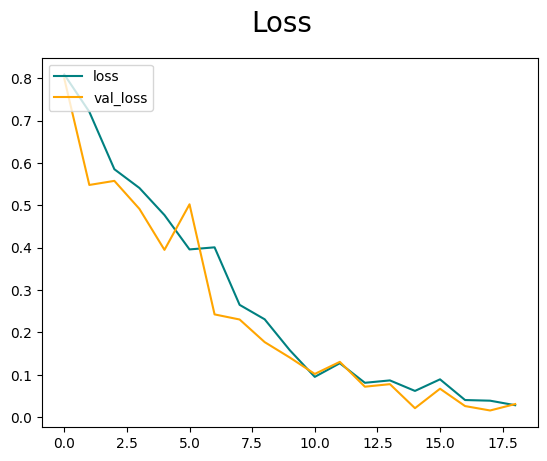

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

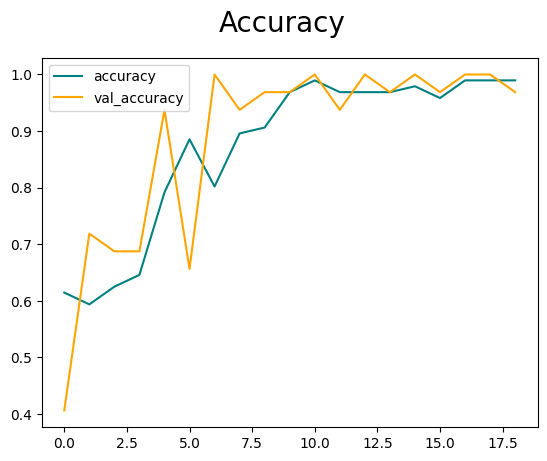

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
import tensorflow as tf

# Assuming y and yhat are your labels and predictions respectively
y = tf.constant([[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]], dtype=tf.int32)
yhat = tf.constant([[0.9, 0.1, 0.2, 0.8, 0.7, 0.3, 0.4, 0.9, 0.8, 0.2, 0.9, 0.9, 0.1, 0.8, 0.2, 0.2, 0.7, 0.8, 0.2, 0.7, 0.3, 0.4, 0.9, 0.8, 0.1, 0.9, 0.8, 0.2, 0.9, 0.1, 0.2, 0.8]], dtype=tf.float32)

# Reshape yhat if necessary to match the shape of y
yhat = tf.reshape(yhat, y.shape)

pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

pre.update_state(y, yhat)
re.update_state(y, yhat)
acc.update_state(y, yhat)

print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [34]:
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


# 10. Test

In [35]:
import cv2

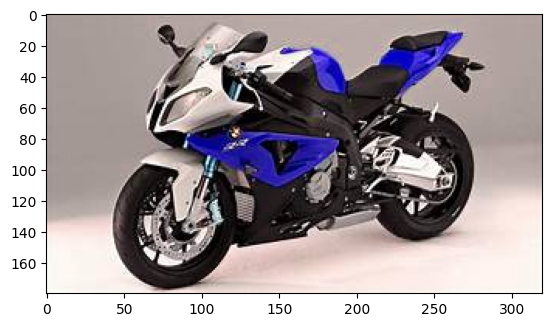

In [36]:
img = cv2.imread('bike2.jpeg')
plt.imshow(img)
plt.show()

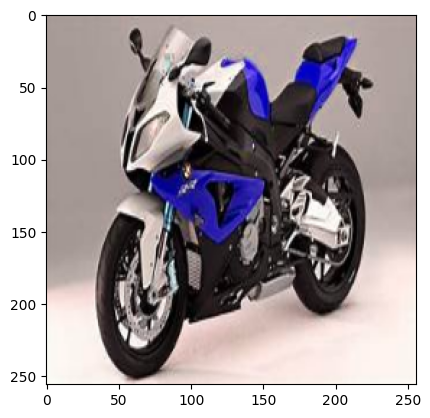

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/256, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [39]:
yhat

array([[0.00048763]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is car')
else:
    print(f'Predicted class is bike')

Predicted class is bike


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models','imageclassifiermodel.h5'))

In [45]:
new_model = load_model(os.path.join('models','imageclassifiermodel.h5'))

In [46]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


In [47]:
if yhatnew > 0.5: 
    print(f'Predicted class is car')
else:
    print(f'Predicted class is bike')

Predicted class is bike


In [48]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'